# Importing the necessary libraries


In [1]:
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import Ridge
from sklearn.tree import DecisionTreeRegressor
import xgboost as xgb
from sklearn import metrics
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import GridSearchCV
import matplotlib
import matplotlib.pyplot as plt
import pickle
import seaborn as sns
import logging

# Initializing the logging format

In [2]:
LOG_FORMAT = "%(asctime)s %(filename)s:%(lineno)d %(message)s"
logging.basicConfig(filename='hr_training.log', level=logging.DEBUG, format=LOG_FORMAT)

# Importing the dataset

In [3]:
df = pd.read_csv("housing_ds.csv",engine="python",index_col=False)

In [4]:
df.head()

,region,price,type,sqfeet,beds,baths,cats_allowed,dogs_allowed,smoking_allowed,wheelchair_access,electric_vehicle_charge,comes_furnished,laundry_options,parking_options,state
0,birmingham,1195,apartment,1908,3,2.0,1,1,1,0,0,0,laundry on site,street parking,al
1,birmingham,1120,apartment,1319,3,2.0,1,1,1,0,0,0,laundry on site,off-street parking,al
2,birmingham,825,apartment,1133,1,1.5,1,1,1,0,0,0,laundry on site,street parking,al
3,birmingham,800,apartment,927,1,1.0,1,1,1,0,0,0,laundry on site,street parking,al
4,birmingham,785,apartment,1047,2,1.0,1,1,1,0,0,0,laundry on site,street parking,al


# Data preprocessing

In [5]:
df.info()
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 265190 entries, 0 to 265189
Data columns (total 15 columns):
region                     265190 non-null object
price                      265190 non-null int64
type                       265190 non-null object
sqfeet                     265190 non-null int64
beds                       265190 non-null int64
baths                      265190 non-null float64
cats_allowed               265190 non-null int64
dogs_allowed               265190 non-null int64
smoking_allowed            265190 non-null int64
wheelchair_access          265190 non-null int64
electric_vehicle_charge    265190 non-null int64
comes_furnished            265190 non-null int64
laundry_options            210879 non-null object
parking_options            170055 non-null object
state                      265189 non-null object
dtypes: float64(1), int64(9), object(5)
memory usage: 30.3+ MB


,price,sqfeet,beds,baths,cats_allowed,dogs_allowed,smoking_allowed,wheelchair_access,electric_vehicle_charge,comes_furnished
count,2.651900e+05,2.651900e+05,265190.000000,265190.000000,265190.000000,265190.000000,265190.000000,265190.000000,265190.000000,265190.000000
mean,1.227285e+04,1.093678e+03,1.912414,1.483468,0.716822,0.696550,0.733896,0.078759,0.014360,0.048644
std,5.376352e+06,2.306888e+04,3.691900,0.630208,0.450543,0.459749,0.441920,0.269362,0.118968,0.215124
min,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,8.170000e+02,7.520000e+02,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.060000e+03,9.500000e+02,2.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000
75%,1.450000e+03,1.156000e+03,2.000000,2.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000
max,2.768307e+09,8.388607e+06,1100.000000,75.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


# Beds Outliers removed

In [6]:
df.beds.unique()

array([   3,    1,    2,    4,    0,    5,    6,    7,    8, 1000, 1100])

In [7]:
df = df[df.beds != 1000]
df = df[df.beds != 1100]

# Parking nans handled

In [8]:
df.parking_options.unique()

array(['street parking', 'off-street parking', nan, 'carport',
       'attached garage', 'detached garage', 'no parking',
       'valet parking'], dtype=object)

In [9]:
df[df['parking_options'].isnull()]

,region,price,type,sqfeet,beds,baths,cats_allowed,dogs_allowed,smoking_allowed,wheelchair_access,electric_vehicle_charge,comes_furnished,laundry_options,parking_options,state
7,birmingham,1085,house,2308,3,2.0,1,1,0,0,0,0,w/d hookups,NaN,al
8,birmingham,1269,apartment,1156,3,2.0,1,1,1,0,0,0,w/d in unit,NaN,al
9,birmingham,799,apartment,703,1,1.0,1,1,1,0,0,0,w/d in unit,NaN,al
10,birmingham,890,apartment,1050,2,2.0,0,0,1,0,0,0,NaN,NaN,al
15,birmingham,1236,apartment,1285,2,2.0,1,1,1,1,0,0,w/d hookups,NaN,al
21,birmingham,700,apartment,906,1,1.0,1,1,1,0,0,0,laundry on site,NaN,al
31,birmingham,1086,apartment,1285,2,2.0,1,1,1,1,0,0,w/d hookups,NaN,al
32,birmingham,1299,apartment,1700,3,2.0,1,1,1,0,0,0,w/d hookups,NaN,al
39,birmingham,1499,apartment,1491,3,2.0,1,1,1,0,0,0,w/d hookups,NaN,al
40,birmingham,1245,apartment,1189,2,2.0,1,1,1,0,0,0,w/d hookups,NaN,al


# Filling null values as "no parking"

In [10]:
df["parking_options"].fillna("no parking", inplace = True) 

# Baths

In [11]:
df.baths.unique()

array([2. , 1.5, 1. , 2.5, 0. , 3. , 3.5, 4. , 4.5, 5. , 6.5, 6. , 5.5,
       7. , 8.5, 7.5, 8. ])

# Laundary nans handled

In [12]:
df.laundry_options.unique()

array(['laundry on site', 'w/d hookups', 'w/d in unit', nan,
       'laundry in bldg', 'no laundry on site'], dtype=object)

In [13]:
df[df['laundry_options'].isnull()]

,region,price,type,sqfeet,beds,baths,cats_allowed,dogs_allowed,smoking_allowed,wheelchair_access,electric_vehicle_charge,comes_furnished,laundry_options,parking_options,state
10,birmingham,890,apartment,1050,2,2.0,0,0,1,0,0,0,NaN,no parking,al
49,birmingham,1250,apartment,1338,3,2.0,0,0,1,0,0,0,NaN,no parking,al
62,birmingham,1260,apartment,5201,3,2.0,1,1,1,0,0,0,NaN,no parking,al
64,birmingham,850,house,1144,3,1.0,0,0,1,0,0,0,NaN,no parking,al
65,birmingham,1050,house,1324,4,2.0,0,0,1,0,0,0,NaN,no parking,al
73,birmingham,775,house,1216,3,1.0,0,0,1,0,0,0,NaN,no parking,al
77,birmingham,750,house,1332,3,1.0,0,0,1,0,0,0,NaN,no parking,al
78,birmingham,925,house,1346,4,2.0,0,0,1,0,0,0,NaN,no parking,al
79,birmingham,880,house,1095,3,1.0,0,0,1,0,0,0,NaN,no parking,al
101,birmingham,750,house,1332,3,1.0,0,0,1,0,0,0,NaN,no parking,al


In [14]:
df["laundry_options"].fillna("no laundry on site", inplace = True) 

In [15]:
#For the one nan value in state column
df.dropna(inplace=True)

# Dropping the state feature since region does the work anyways

In [16]:
df = df.drop('state', axis=1)

# Change current dtypes of columns to appropriate data types

In [17]:
""" region => categorical
    type => categorical
    cats_allowed => categorical
    dogs_allowed => categorical
    smoking_allowed => categorical
    wheelchair_access => categorical
    electric_vehicle_charge => categorical
    comes_furnished => categorical
    laundry_options => categorical
    parking_options => categorical
    state => categorical
    rest of the columns will be converted to float64 for the sake of uniformity and simplicity
"""

' region => categorical\n    type => categorical\n    cats_allowed => categorical\n    dogs_allowed => categorical\n    smoking_allowed => categorical\n    wheelchair_access => categorical\n    electric_vehicle_charge => categorical\n    comes_furnished => categorical\n    laundry_options => categorical\n    parking_options => categorical\n    state => categorical\n    rest of the columns will be converted to float64 for the sake of uniformity and simplicity\n'

In [18]:
for col in ['region', 'type', 'cats_allowed', 'dogs_allowed', 'smoking_allowed', 'wheelchair_access',
            'electric_vehicle_charge', 'comes_furnished', 'laundry_options', 'parking_options']:
    df[col] = df[col].astype('category')

In [19]:
for col in ['price', 'sqfeet', 'beds']:
    df[col] = df[col].astype('float64')

In [20]:
df_cat = df[['region', 'type', 'laundry_options', 'parking_options']]
df_float = df[['price','sqfeet','beds','baths']]
df_rest = df[['cats_allowed','dogs_allowed','smoking_allowed','wheelchair_access',
              'electric_vehicle_charge','comes_furnished']]

In [21]:
df_cat_Dummies = pd.get_dummies(df_cat)

# Dropping one column from each category converted into dummies in order to avoid multi-collinearity

In [22]:
df_cat_Dummies.drop(['region_zanesville / cambridge', 'type_townhouse', 
                'laundry_options_w/d in unit', 'parking_options_valet parking'],axis=1,inplace=True)

# Merging all the dataframes into one

In [23]:
result_df = pd.concat([df_float, df_cat_Dummies, df_rest], axis=1)

In [24]:
result_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 265186 entries, 0 to 265188
Columns: 328 entries, price to comes_furnished
dtypes: category(6), float64(4), uint8(318)
memory usage: 92.1 MB


# Frequency plots using seaborn

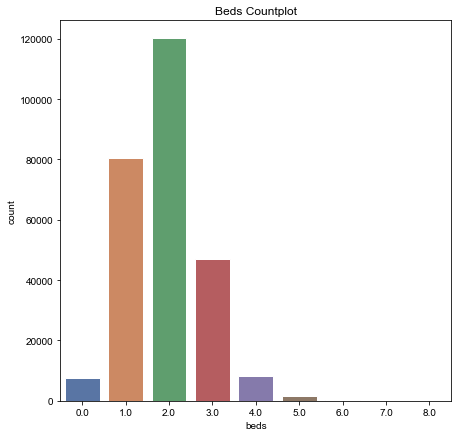

In [33]:
fig, ax = plt.subplots(figsize=(7,7)) 
sns.set(style="darkgrid")
ax = sns.countplot(x="beds", data=df).set_title("Beds Countplot")

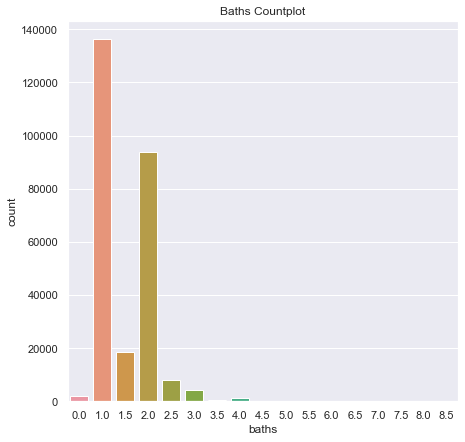

In [34]:
fig, ax = plt.subplots(figsize=(7,7)) 
sns.set(style="darkgrid")
ax = sns.countplot(x="baths", data=df).set_title("Baths Countplot")

[Text(0, 0, 'laundry in bldg'),
 Text(0, 0, 'laundry on site'),
 Text(0, 0, 'no laundry on site'),
 Text(0, 0, 'w/d hookups'),
 Text(0, 0, 'w/d in unit')]

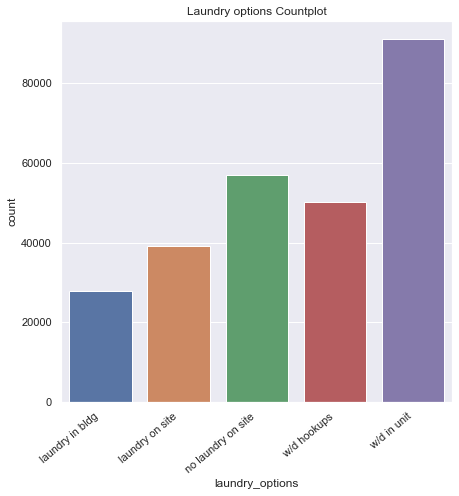

In [35]:
fig, ax = plt.subplots(figsize=(7,7)) 
sns.set(style="darkgrid")
sns.countplot(x="laundry_options", data=df).set_title("Laundry options Countplot")
ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right")

[Text(0, 0, 'attached garage'),
 Text(0, 0, 'carport'),
 Text(0, 0, 'detached garage'),
 Text(0, 0, 'no parking'),
 Text(0, 0, 'off-street parking'),
 Text(0, 0, 'street parking'),
 Text(0, 0, 'valet parking')]

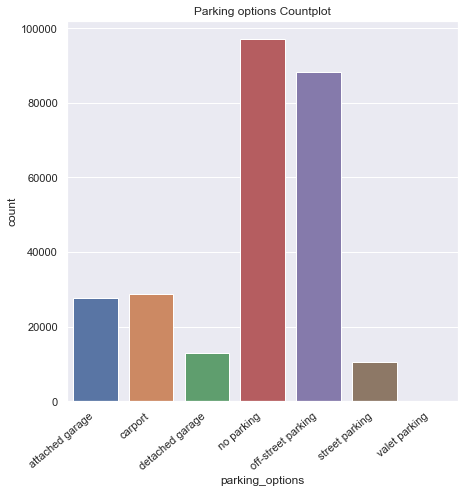

In [36]:
fig, ax = plt.subplots(figsize=(7,7)) 
sns.set(style="darkgrid")
sns.countplot(x="parking_options", data=df).set_title("Parking options Countplot")
ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right")

Text(0.5, 1.0, 'Cats allowed Countplot')

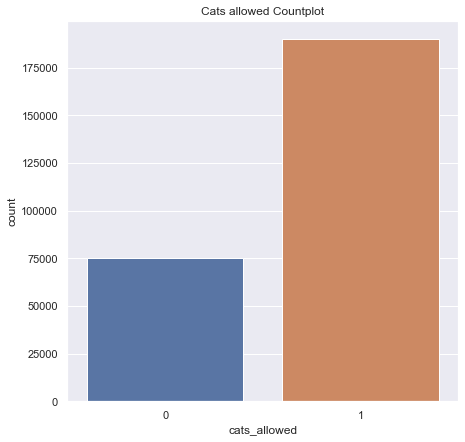

In [37]:
fig, ax = plt.subplots(figsize=(7,7)) 
sns.set(style="darkgrid")
sns.countplot(x="cats_allowed", data=df).set_title("Cats allowed Countplot")

Text(0.5, 1.0, 'Dogs allowed Countplot')

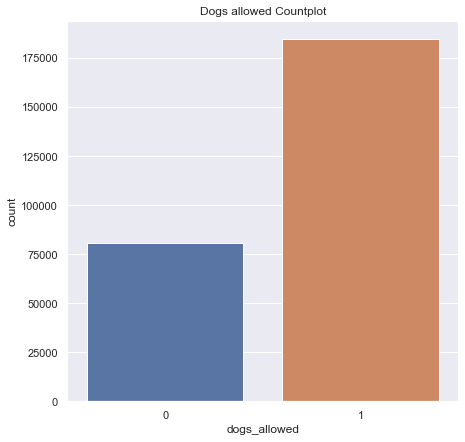

In [38]:
fig, ax = plt.subplots(figsize=(7,7)) 
sns.set(style="darkgrid")
sns.countplot(x="dogs_allowed", data=df).set_title("Dogs allowed Countplot")

Text(0.5, 1.0, 'Smoking allowed Countplot')

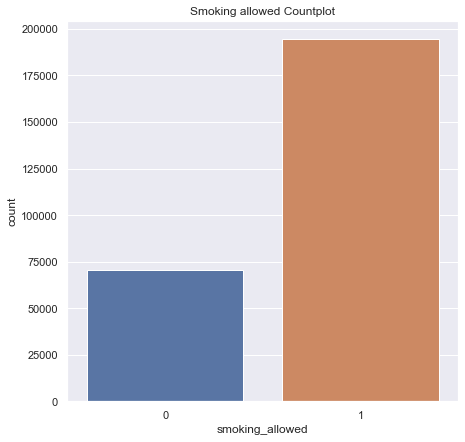

In [39]:
fig, ax = plt.subplots(figsize=(7,7)) 
sns.set(style="darkgrid")
sns.countplot(x="smoking_allowed", data=df).set_title("Smoking allowed Countplot")

Text(0.5, 1.0, 'Wheelchair access Countplot')

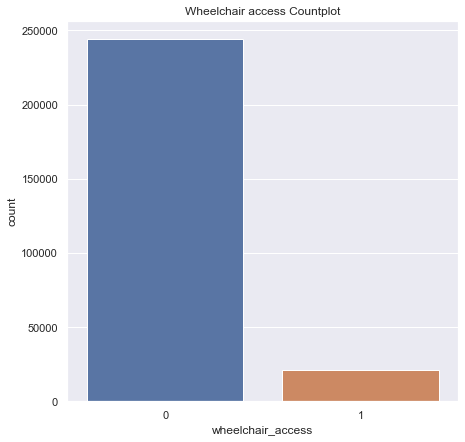

In [40]:
fig, ax = plt.subplots(figsize=(7,7)) 
sns.set(style="darkgrid")
sns.countplot(x="wheelchair_access", data=df).set_title("Wheelchair access Countplot")

Text(0.5, 1.0, 'Furnished houses Countplot')

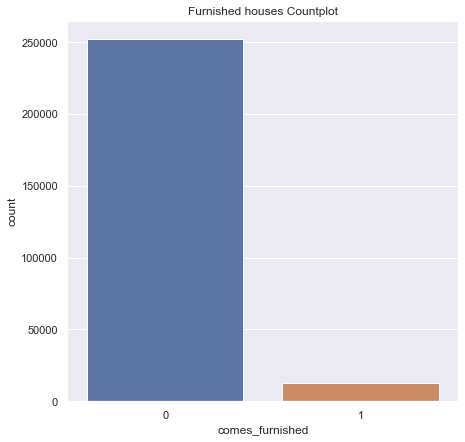

In [41]:
fig, ax = plt.subplots(figsize=(7,7)) 
sns.set(style="darkgrid")
sns.countplot(x="comes_furnished", data=df).set_title("Furnished houses Countplot")

Text(0.5, 1.0, 'Electric vehicle charging facility availability Countplot')

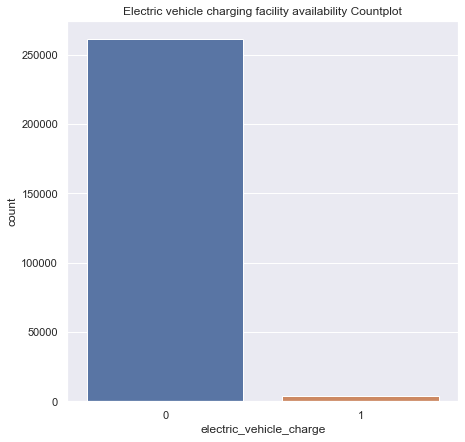

In [42]:
fig, ax = plt.subplots(figsize=(7,7)) 
sns.set(style="darkgrid")
sns.countplot(x="electric_vehicle_charge", data=df).set_title("Electric vehicle charging facility availability Countplot")

# Seperating the independent and dependent variables 


In [25]:
y = result_df['price']
X = result_df.iloc[:,1:]

# Splitting the dataset for training and testing

In [44]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)


# 3) Decision Tree

# Initializing and fitting

In [45]:
dtree=DecisionTreeRegressor(criterion="mse")
dtree.fit(X_train,y_train)

DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=None,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=None, splitter='best')

In [46]:
logging.debug("Decision tree model info:-{}".format(dtree))

# Predicting the test dataset values

In [47]:
y_dtree_pred = dtree.predict(X_test)
logging.debug('Predicions on test set:{}'.format(y_dtree_pred))

# Printing and logging the mean absolute, mean square and root mean squared errors

In [48]:
print('MAE:', metrics.mean_absolute_error(y_test, y_dtree_pred))
print('MSE:', metrics.mean_squared_error(y_test, y_dtree_pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_dtree_pred)))

MAE: 27164.815648772987
MSE: 36135151275903.46
RMSE: 6011252.055595694


In [49]:
logging.debug('MAE:{}'.format(metrics.mean_absolute_error(y_test, y_dtree_pred)))
logging.debug('MSE:{}'.format(metrics.mean_squared_error(y_test, y_dtree_pred)))
logging.debug('RMSE:{}'.format(np.sqrt(metrics.mean_squared_error(y_test, y_dtree_pred))))

# Saving the model using pickle

In [ ]:
import pickle
pickle.dump(dtree,open('house_rent.pkl','wb'))

# Following are the other models i tried using, I am not going into the details with them because logistic regression was finalized.

# 1) Linear reg

In [ ]:
regressor=LinearRegression()
regressor.fit(X_train,y_train)

In [ ]:
print("Coefficient of determination R^2 <-- on train set: {}".format(regressor.score(X_train, y_train)))
print("Coefficient of determination R^2 <-- on test set: {}".format(regressor.score(X_test, y_test)))

# 2) Ridge reg

In [ ]:
ridge=Ridge()
ridge.fit(X_train,y_train)

In [ ]:
print("Coefficient of determination R^2 <-- on train set: {}".format(ridge.score(X_train, y_train)))
print("Coefficient of determination R^2 <-- on test set: {}".format(ridge.score(X_test, y_test)))

# 4) Random tree

In [ ]:
rregressor=RandomForestRegressor()
rregressor.fit(X_train,y_train)

In [ ]:
print("Coefficient of determination R^2 <-- on train set: {}".format(rregressor.score(X_train, y_train)))
print("Coefficient of determination R^2 <-- on test set: {}".format(rregressor.score(X_test, y_test)))

In [ ]:
y_rtree_pred = rregressor.predict(X_test)

In [ ]:
print('MAE:', metrics.mean_absolute_error(y_test, y_rtree_pred))
print('MSE:', metrics.mean_squared_error(y_test, y_rtree_pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_rtree_pred)))

In [ ]:
pickle.dump(rregressor,open('house_rent_randomforest.pkl','wb'))

# 5) XGB

In [ ]:
X_train = X_train.astype('float')
X_test = X_test.astype('float')

In [ ]:
xgbregressor=xgb.XGBRegressor()
xgbregressor.fit(X_train,y_train)

In [ ]:
print("Coefficient of determination R^2 <-- on train set: {}".format(xgbregressor.score(X_train, y_train)))
print("Coefficient of determination R^2 <-- on test set: {}".format(xgbregressor.score(X_test, y_test)))

In [ ]:
y_xgbpred = xgbregressor.predict(X_test)

In [ ]:
print('MAE:', metrics.mean_absolute_error(y_test, y_xgbpred))
print('MSE:', metrics.mean_squared_error(y_test, y_xgbpred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_xgbpred)))

# Elastic lasso

In [ ]:
from sklearn.linear_model import ElasticNet
regr = ElasticNet(random_state=0,alpha=5)

In [ ]:
regr.fit(X_train,y_train)

In [ ]:
yelas_pred = regr.predict(X_test)

In [ ]:
print("Coefficient of determination R^2 <-- on train set: {}".format(regr.score(X_train, y_train)))
print("Coefficient of determination R^2 <-- on test set: {}".format(regr.score(X_test, y_test)))

In [ ]:
print('MAE:', metrics.mean_absolute_error(y_test, yelas_pred))
print('MSE:', metrics.mean_squared_error(y_test, yelas_pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, yelas_pred)))

In [ ]:
data_tuples = list(zip(yelas_pred,y_xgbpred, y_rtree_pred, y_dtree_pred,y_test))
pd.DataFrame(data_tuples, columns=['elas','xgb','randomforest','decisionTree','actual'])

# Rough work

In [ ]:
df.columns


In [ ]:
"""
region --- drop down
type --- drop down
sqfeet --- input box
beds --- drop down
baths --- drop down
cats --- drop down
dogs --- drop down
smoking --- drop down
wheelchair --- drop down
electric vehicle --- drop down
furnished --- drop down
laundary --- drop down
parking --- drop down
state --- drop down
"""

In [ ]:
region_dd = list(df.parking_options.unique())
region_dd = [i.capitalize() for i in region_dd]
region_dd.sort()

In [ ]:
n = 315
for i in region_dd:
    print('<option value={}>'.format(n)+i+'</option>')
    n=n+1

In [ ]:
df.loc[88996]

In [ ]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

"""bestfeatures = SelectKBest(score_func=chi2, k=50)
fit = bestfeatures.fit(X,y)
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(X.columns)
featureScores = pd.concat([dfcolumns,dfscores],axis=1)
featureScores.columns = ['Specs','Score']  #naming the dataframe columns"""

In [ ]:
bestfeats = featureScores.nlargest(365,'Score')

In [28]:
len(df.region.unique())

298

In [27]:
len(X.columns)

327

In [82]:
X.iloc[:,324:325]

,wheelchair_access
0,0
1,0
2,0
3,0
4,0
5,0
6,0
7,0
8,0
9,0
